In [1]:
#############################################################################################
# Description:
# In this file we want to download and clean the data
#
#############################################################################################

# Install keras and seaborn in case you don't have it yet
!pip install keras

# Seaborn is used for plotting the different covariates against each other
!pip install -q seaborn

In [2]:
# Import all the relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [3]:
# Download the red wine dataset and store the path to it
dataset_path_red = keras.utils.get_file("winequality-red.csv", "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")

In [4]:
# Download the white wine dataset and store the path to it
dataset_path_white = keras.utils.get_file("winequality-white.csv", "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv")

In [5]:
# Define the column names of the dataset
column_names = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides',
                'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Read the dataset which was previously downloaded
raw_dataset_red = pd.read_csv(dataset_path_red, names=column_names,
                      na_values = "None", comment='\t',
                      sep=";", skipinitialspace=False, header = 0)

# Store the dataset in new variable
dataset_red = raw_dataset_red.copy()

# Display the head of the dataset to ensure that everything went as planned
dataset_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Repeat the same steps for the white wine dataset
raw_dataset_white = pd.read_csv(dataset_path_white, names=column_names,
                      na_values = "None", comment='\t',
                      sep=";", skipinitialspace=False, header = 0)

dataset_white = raw_dataset_white.copy()
dataset_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# Sum up all NA values for the red wine dataset
dataset_red.isna().sum() # no NA values, so nothing do drop!

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Sum up all NA values for the white wine dataset
dataset_white.isna().sum() # no NA values, so nothing do drop!

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

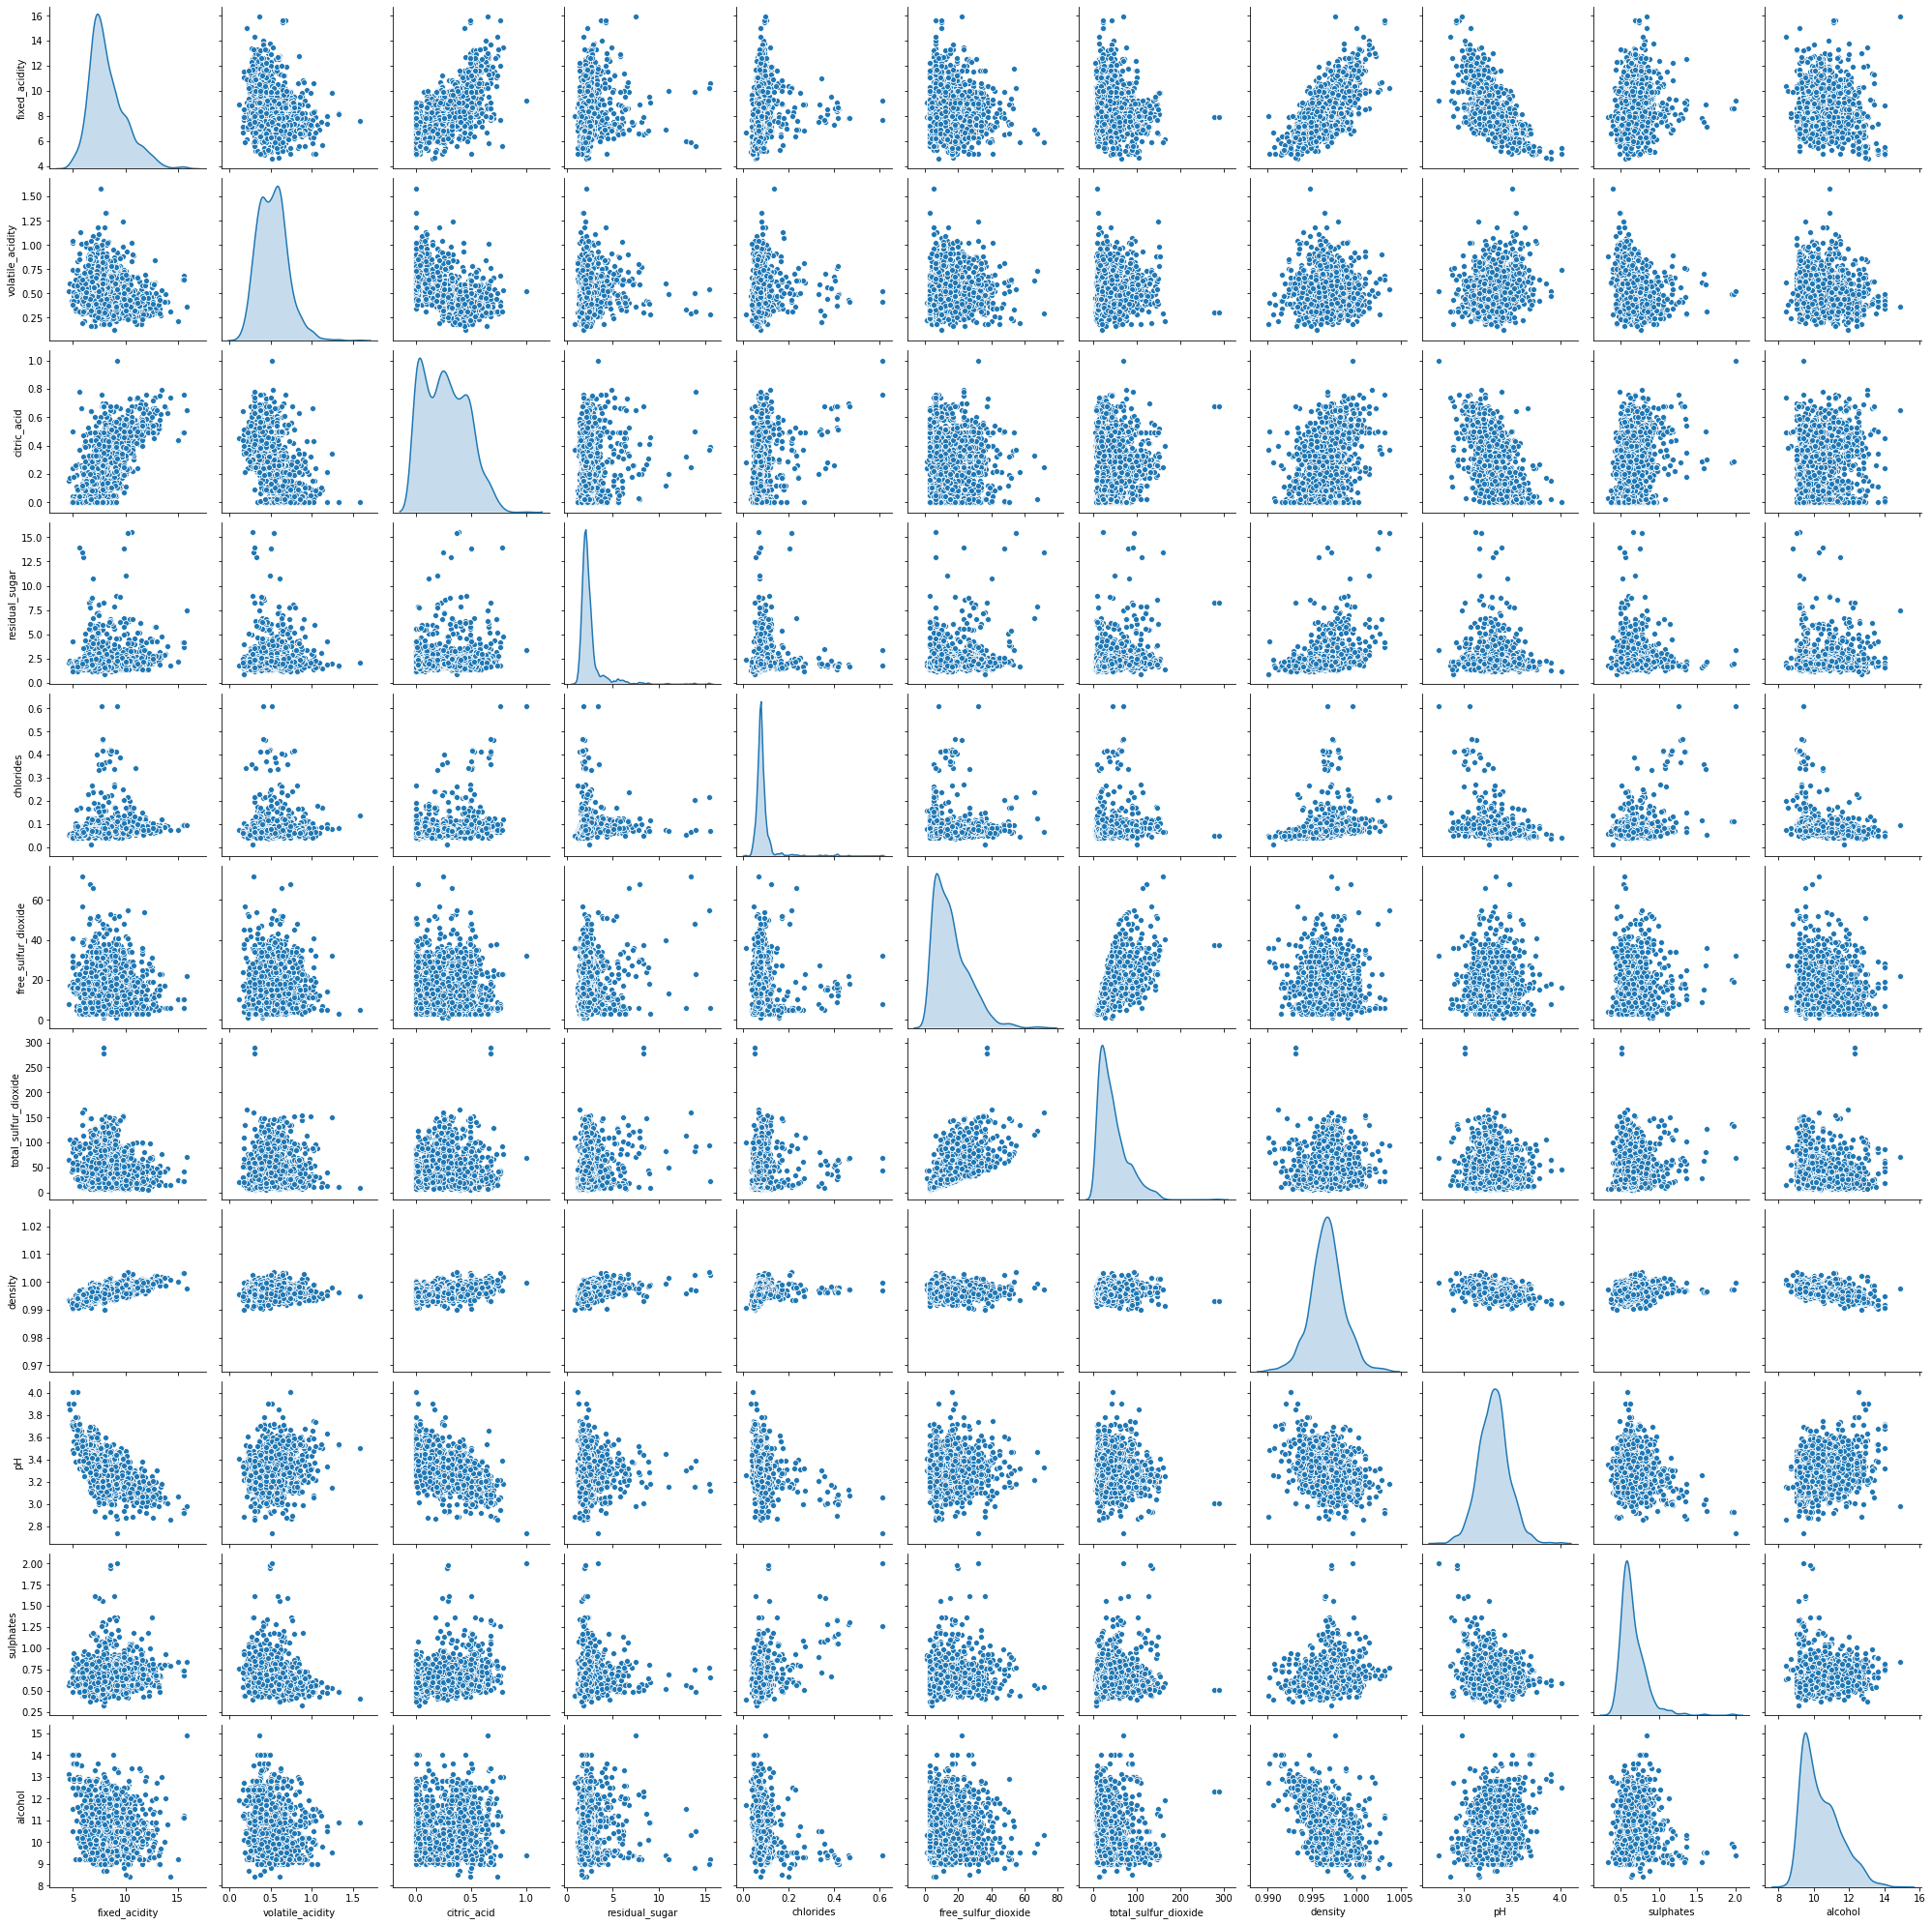

In [9]:
# For the red wine: We plot each pair of covariates against each other, from a first glance, none of the variables seem to be extremely correlated
sns.pairplot(dataset_red[["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides",
                "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol"]], diag_kind="kde")

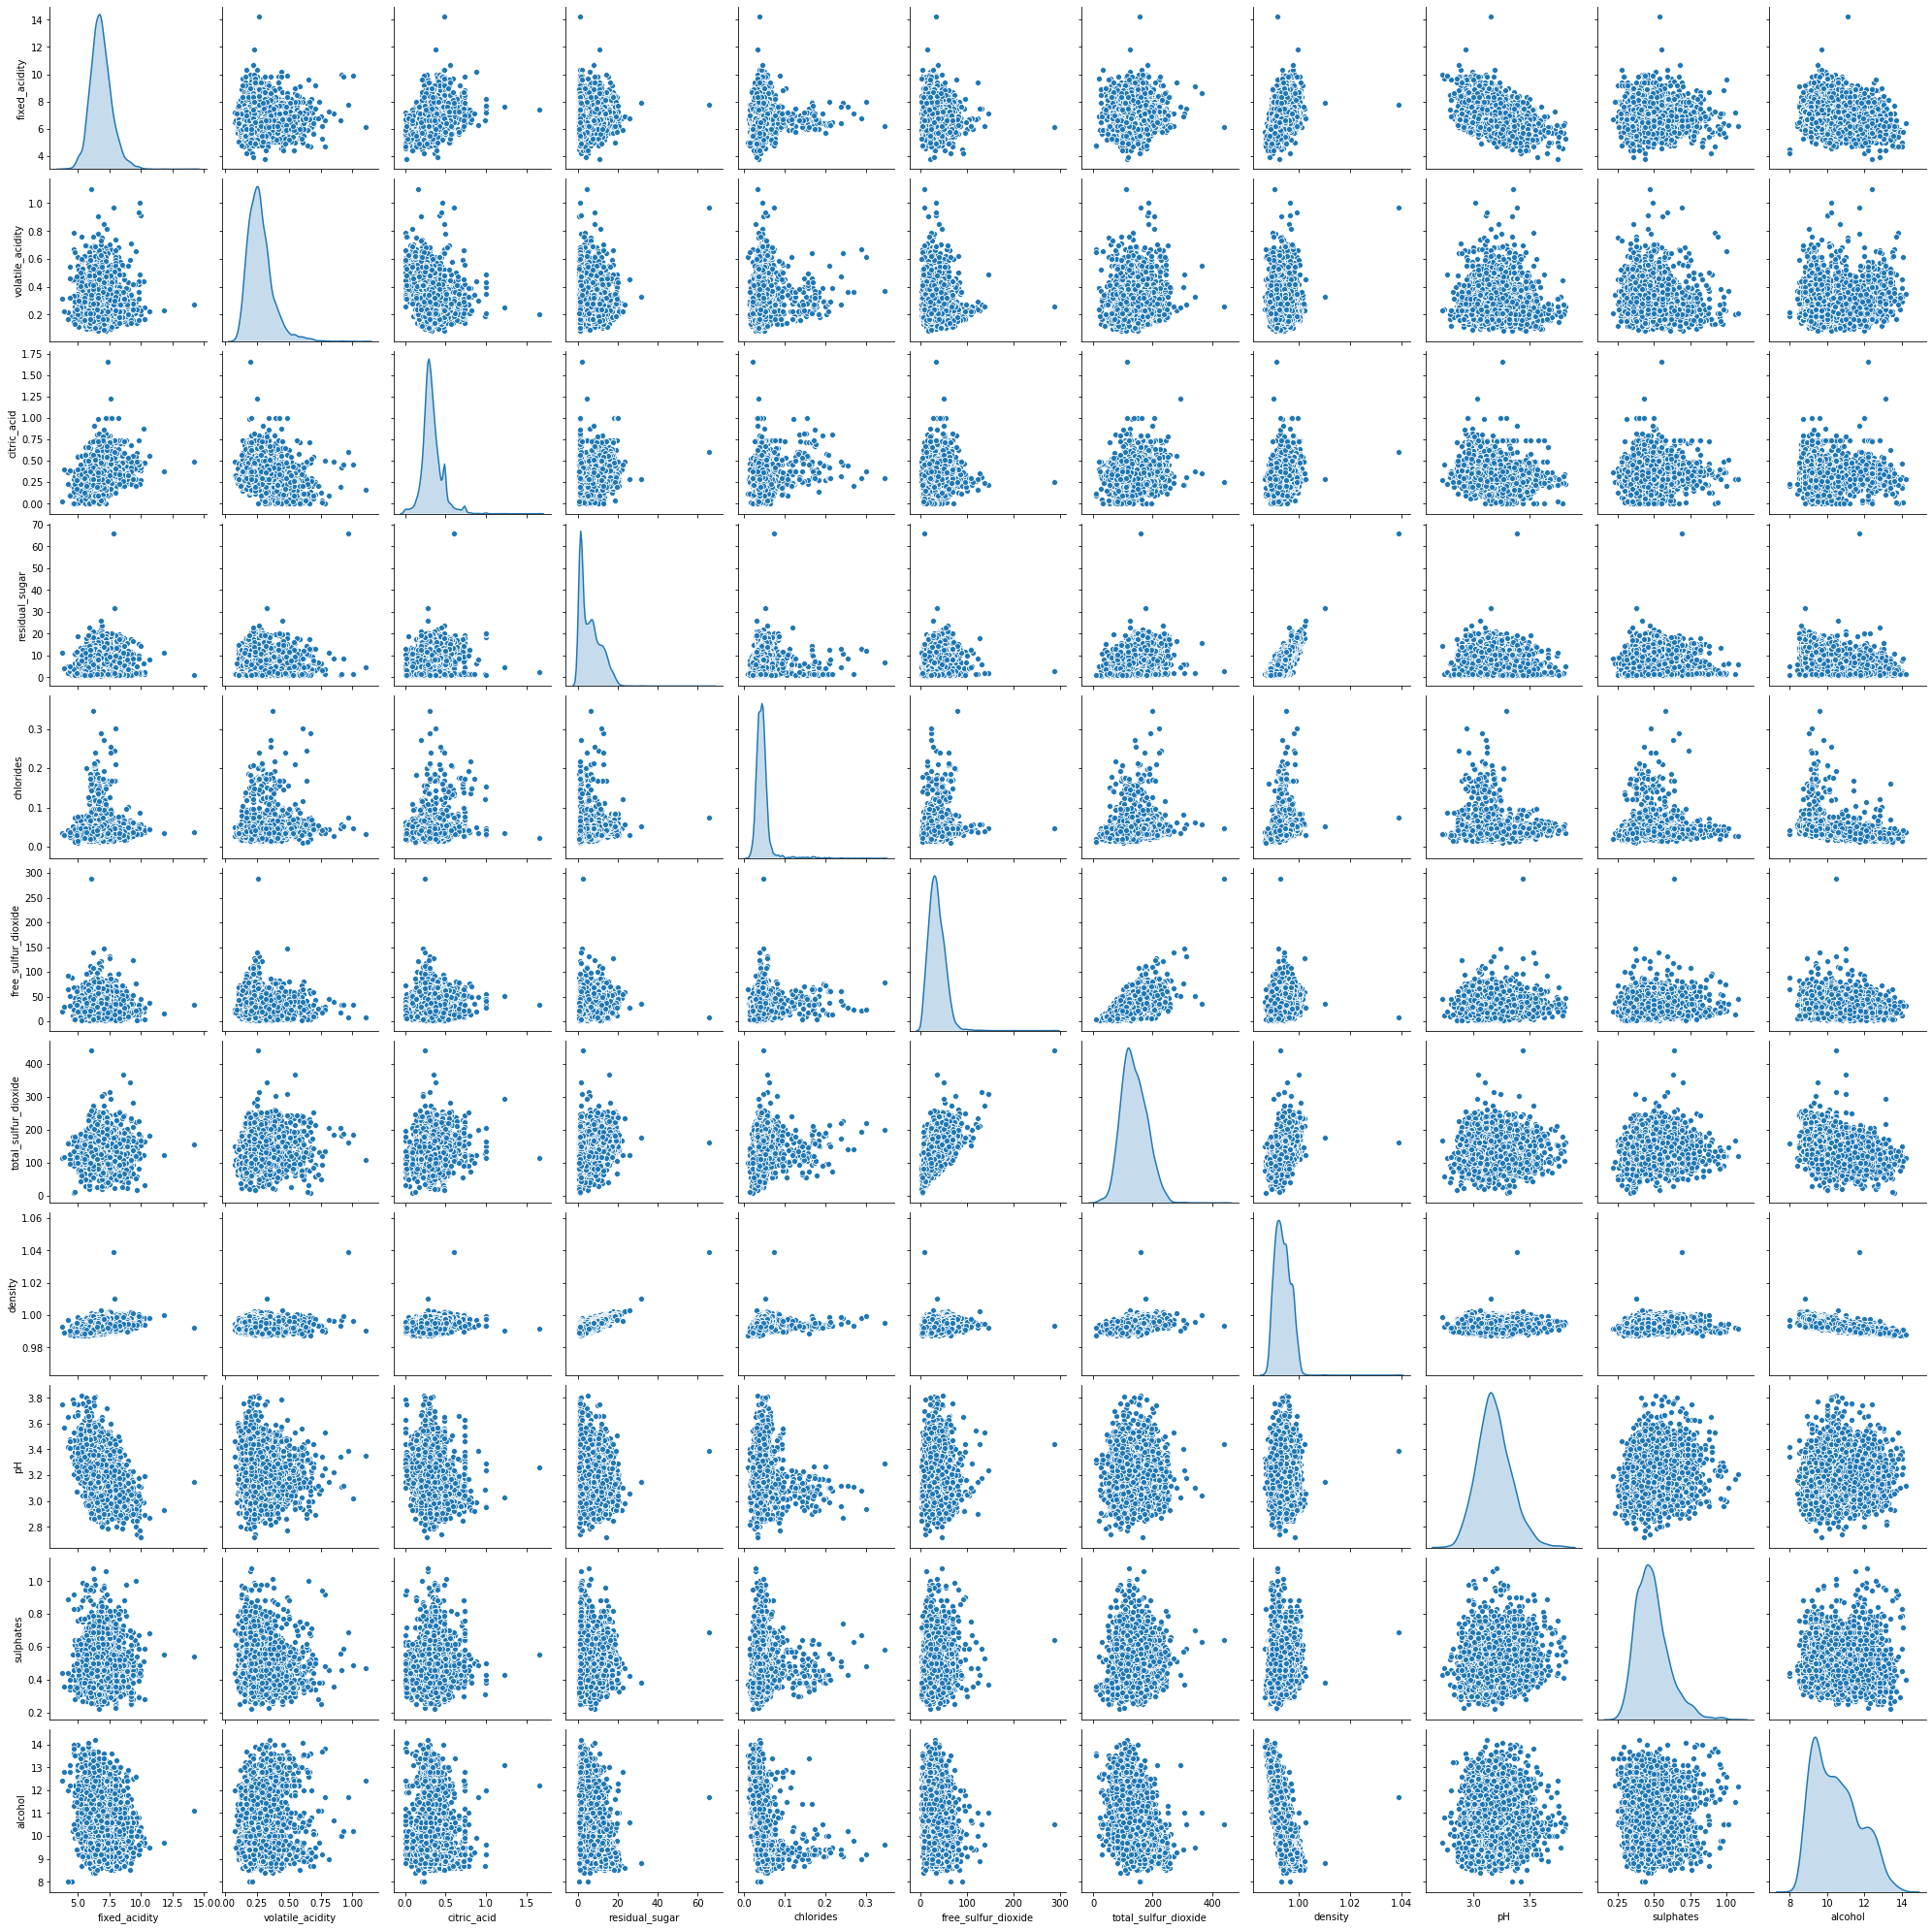

In [10]:
# For the white wine: We plot each pair of covariates against each other, again not too high correlation
sns.pairplot(dataset_white[["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides",
                "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol"]], diag_kind="kde")

In [11]:
# Print the covariance matrix
print(dataset_red.corr())

# Our suspicion is proven, no extremely high correlation, so we don't need to remove any covariates

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.256131     0.671703   
volatile_acidity          -0.256131          1.000000    -0.552496   
citric_acid                0.671703         -0.552496     1.000000   
residual_sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free_sulfur_dioxide       -0.153794         -0.010504    -0.060978   
total_sulfur_dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

In [12]:
# Print the covariance matrix
print(dataset_white.corr())

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.022697     0.289181   
volatile_acidity          -0.022697          1.000000    -0.149472   
citric_acid                0.289181         -0.149472     1.000000   
residual_sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free_sulfur_dioxide       -0.049396         -0.097012     0.094077   
total_sulfur_dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

In [13]:
# Save the data, it is now ready to use for the random forest and neural net
dataset_red.to_csv("data/dataset_red.csv")
dataset_white.to_csv("data/dataset_white.csv")